In [98]:
import numpy as np
from matplotlib import pyplot as plt
import os
import pickle
import json
from copy import deepcopy
import pandas as pd
import sys
sys.path.insert(0, '../')
sys.path.insert(0, '../../')
from style import style_setup

os.system('python ../style/style_setup.py')

0

In [99]:
path_to_RNNs = '/Users/tolmach/Documents/GitHub/rnn_coach/data/trained_RNNs/CDDMtanh'

In [100]:
subfolders = os.listdir(path_to_RNNs)
if ".DS_Store" in subfolders:
    subfolders.remove(".DS_Store")

In [101]:
int(subfolder.split("maxiter=")[1])

3000

In [102]:
scores = []
Ns = []
lmbdos = []
lmbdrs = []
maxiters = []
sigmas = []
n_stepss = []
orth_input_onlys = []
for subfolder in subfolders:
    score = float(subfolder.split("_")[0])
    N = int(subfolder.split(";")[2].split("=")[1])
    lmbdo = float(subfolder.split("lmbdo=")[1].split(";")[0])
    if "orth_inp_only" in subfolder:
        orth_input_only = bool(subfolder.split("orth_inp_only=")[1].split(";")[0])
    else:
        orth_input_only = "NA"
    lmbdr = float(subfolder.split("lmbdr=")[1].split(";")[0])
    maxiter = int(subfolder.split("maxiter=")[1])
    
    config_data = json.load(open(os.path.join(path_to_RNNs, subfolder, f"{score}_config.json"), 'rb+'))
    sigma = config_data["sigma_rec"]
    n_steps = config_data["n_steps"]
    
    scores.append(score)
    Ns.append(N)
    lmbdos.append(lmbdo)
    orth_input_onlys.append(orth_input_only)
    lmbdrs.append(lmbdr)
    maxiters.append(maxiter)
    sigmas.append(sigma)
    n_stepss.append(n_steps)

In [103]:
df = pd.DataFrame.from_dict({"score" : scores,
                             "N" : Ns,
                             "n_steps" : n_stepss,
                             "lmbdo" : lmbdos,
                             "orth_input_only" : orth_input_onlys,
                             "lmbdr" : lmbdrs,
                             "maxiter" : maxiters,
                             "sigma" : sigmas,
                             "name" : subfolders})

In [104]:
df

,score,N,n_steps,lmbdo,orth_input_only,lmbdr,maxiter,sigma,name
0,0.012142,100,300,0.3,NA,0.5,1500,0.05,0.0121422_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
1,0.011948,100,300,0.3,NA,0.5,1500,0.05,0.0119477_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
2,0.011763,100,300,0.3,NA,0.5,1500,0.05,0.0117633_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
3,0.012055,100,300,0.3,NA,0.5,1500,0.05,0.0120547_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
4,0.011997,100,300,0.3,NA,0.5,1500,0.05,0.0119967_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
...,...,...,...,...,...,...,...,...,...
95,0.011979,100,300,0.3,NA,0.5,1500,0.05,0.0119791_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
96,0.012174,100,300,0.3,NA,0.5,1500,0.05,0.0121744_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
97,0.012546,100,300,0.3,NA,0.5,1500,0.05,0.0125458_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
98,0.012086,100,300,0.3,NA,0.5,1500,0.05,0.0120862_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...


In [108]:
filtered_values = np.where((df['lmbdr']==0.5) & (df['sigma'] == 0.05) & (df["n_steps"] == 300) & (df["orth_input_only"] == 'NA'))[0]
df_filtered = df.loc[filtered_values].sort_values(by=['score'], ascending=True)

In [109]:
df_filtered

,score,N,n_steps,lmbdo,orth_input_only,lmbdr,maxiter,sigma,name
81,0.011154,100,300,0.3,NA,0.5,1500,0.05,0.0111542_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
55,0.011289,100,300,0.3,NA,0.5,1500,0.05,0.0112893_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
32,0.011319,100,300,0.3,NA,0.5,1500,0.05,0.0113189_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
59,0.011331,100,300,0.3,NA,0.5,1500,0.05,0.0113312_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
65,0.011347,100,300,0.3,NA,0.5,1500,0.05,0.0113474_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
...,...,...,...,...,...,...,...,...,...
28,0.013287,100,300,0.3,NA,0.5,1500,0.05,0.0132869_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
33,0.013336,100,300,0.3,NA,0.5,1500,0.05,0.0133358_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
57,0.013492,100,300,0.3,NA,0.5,1500,0.05,0.0134915_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...
68,0.013540,100,300,0.3,NA,0.5,1500,0.05,0.0135398_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;...


In [112]:
df_filtered["name"].tolist()

['0.0111542_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0112893_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0113189_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0113312_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0113474_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0113801_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0113808_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0114193_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0114748_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0114938_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0115308_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0115437_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0116138_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter=1500',
 '0.0116196_CDDM;tanh;N=100;lmbdo=0.3;lmbdr=0.5;lr=0.005;maxiter

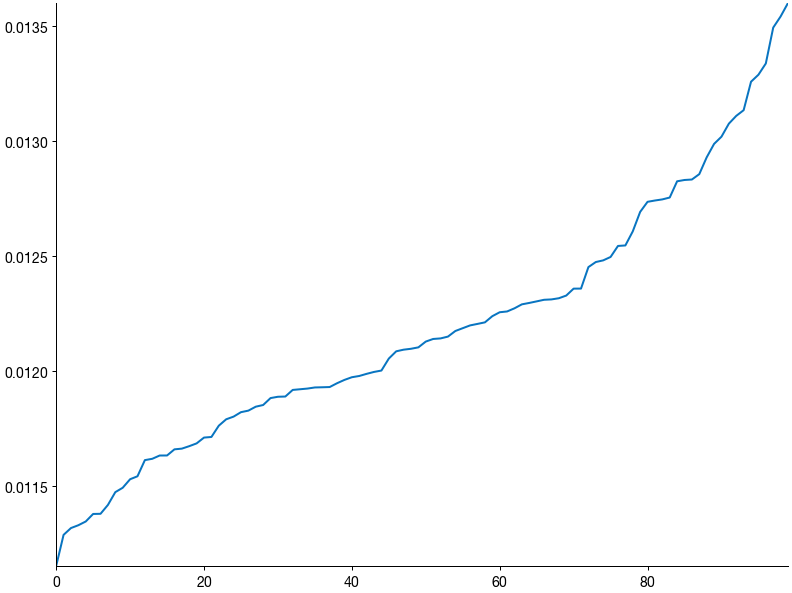

In [113]:
plt.plot(list(df_filtered["score"]))
# plt.axvline(200)

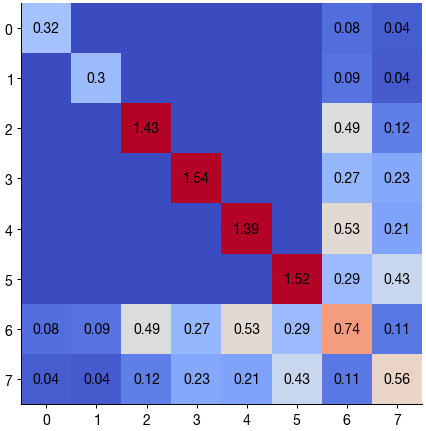

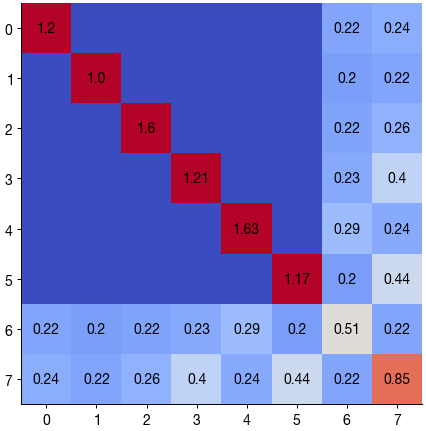

In [114]:
filtered_subfolders = df_filtered["name"].tolist()
filtered_scores = df_filtered["score"].tolist()
for k in [1, 50]:
    params = json.load(open(os.path.join(path_to_RNNs, filtered_subfolders[k], f"{filtered_scores[k]}_params_CDDM.json"), 'rb+'))
    W_out = np.array(params["W_out"])
    W_inp = np.array(params["W_inp"])
    mat = np.hstack([W_inp, W_out.T])
    mat = mat.T @ mat
    fig, ax = plt.subplots(1, 1, figsize = (3,3))
    ax.imshow(mat, cmap='coolwarm', vmin = 0, vmax = 1)
    
    for (i, j), z in np.ndenumerate(mat):
        if np.abs(z) > 0.01:
            ax.text(j, i, str(np.round(z, 2)), ha="center", va="center", color='k', fontsize=7)
    plt.show()

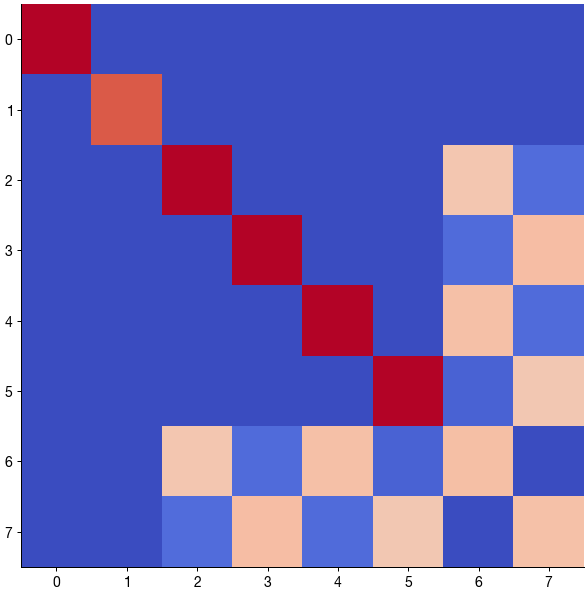